cv version: 4.5.4.58


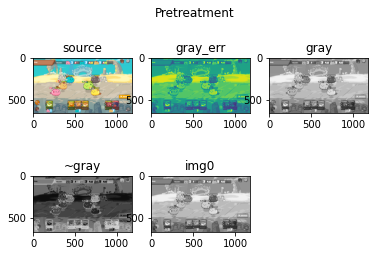

In [97]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
print(f'cv version: {cv2.version.opencv_version}')

img = cv2.imread("images/20211025-160926.png")
img0 = cv2.imread("images/20211025-160926.png", 0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rev_gray = ~gray

# plt.imshow(img) # 使用会绿的发慌
plt.suptitle("Pretreatment")
# plt.figure(figsize=(60, 65))

plt.subplot(2, 3, 1)
plt.title("source")
plt.imshow(img)

plt.subplot(2, 3, 2)
plt.title("gray_err")
plt.imshow(gray)

plt.subplot(2, 3, 3)
plt.title("gray")
plt.imshow(gray, cmap="gray")

plt.subplot(2, 3, 4)
plt.title("~gray")
plt.imshow(rev_gray, cmap="gray")

plt.subplot(2, 3, 5)
# plt.figure(figsize=(60, 65))
plt.title("img0")
plt.imshow(img0, cmap="gray")
# plt.show() # 不需要调用这个居然也可以显示

## 函数定义

In [299]:
def draw_sub(num: int, title: str, img):
    plt.figure(figsize=(100, 130))
    plt.subplot(5, 5, num)
    plt.title(title)
    plt.imshow(img, cmap="gray")

def draw_sub_small(num: int, title: str, img):
#     plt.figure(figsize=(10, 10))
    plt.subplot(1, 9, num)
    plt.title(title)
    plt.imshow(img, cmap="gray")
    
# opencv读入模版小图片
def open_template_pic(list_name) -> list:
    list_f = []
    for n in list_name:
        _ = cv2.imread(f"images/template_{n}.png", 0)
        list_f.append(_)
    return list_f

# opencv读入标准模版文件
def open_template_standard_pic(list_name) -> list:
    list_f = []
    for n in list_name:
        _ = cv2.imread(f"images/{n}.png", 0)
#         _=cv2.resize(_,None,fx=0.2,fy=0.2,interpolation=cv2.INTER_CUBIC)
        __,_=cv2.threshold(_,250,255,cv2.THRESH_BINARY)
        list_f.append(_)
    return list_f

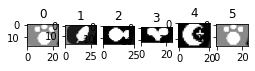

In [300]:
import time

img0 = img0
img2 = img0.copy()
pic_num = 0
# template = cv2.imread('messi_face.jpg',0)
list_template_pic_name = ["food", "leaf", "fish", "heart", "moon", "food"]
list_template = open_template_pic(list_template_pic_name)
for i, v in enumerate(list_template):
    pic_num = pic_num + 1
    draw_sub_small(pic_num, i, v)

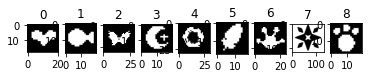

In [301]:
import time

img0 = img0
img2 = img0.copy()
pic_num = 0
# template = cv2.imread('messi_face.jpg',0)
list_template_pic_name = ["plant", "aquatic", "bug", "dusk", "mech", "bird", "reptile", "dawn", "best"]
list_template = open_template_standard_pic(list_template_pic_name)
for i, v in enumerate(list_template):
    pic_num = pic_num + 1
    draw_sub_small(pic_num, i, v)


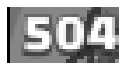

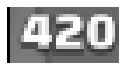

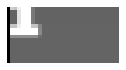

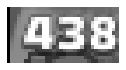

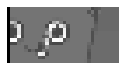

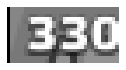

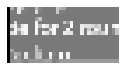

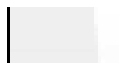

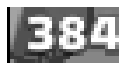

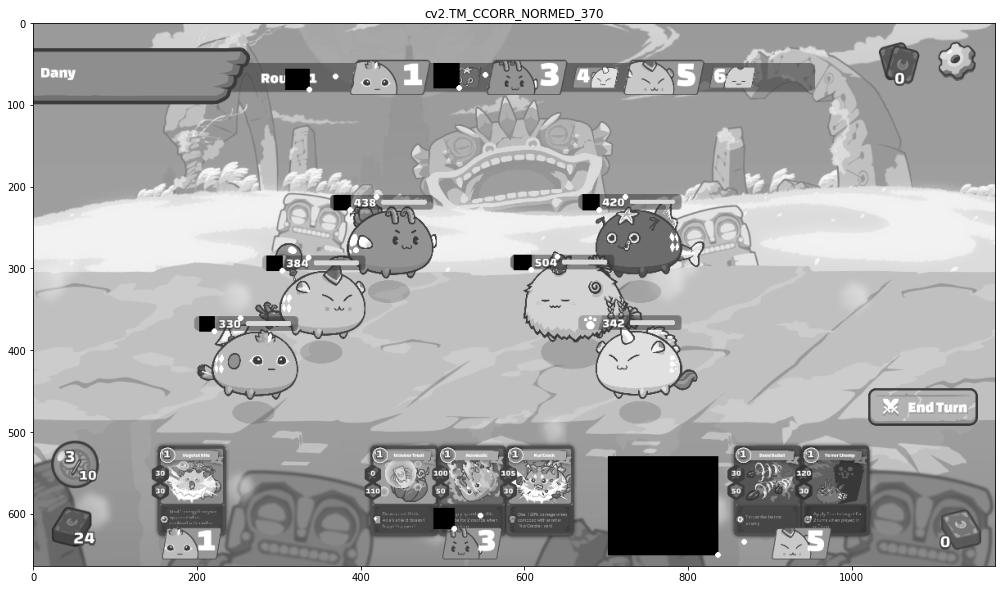

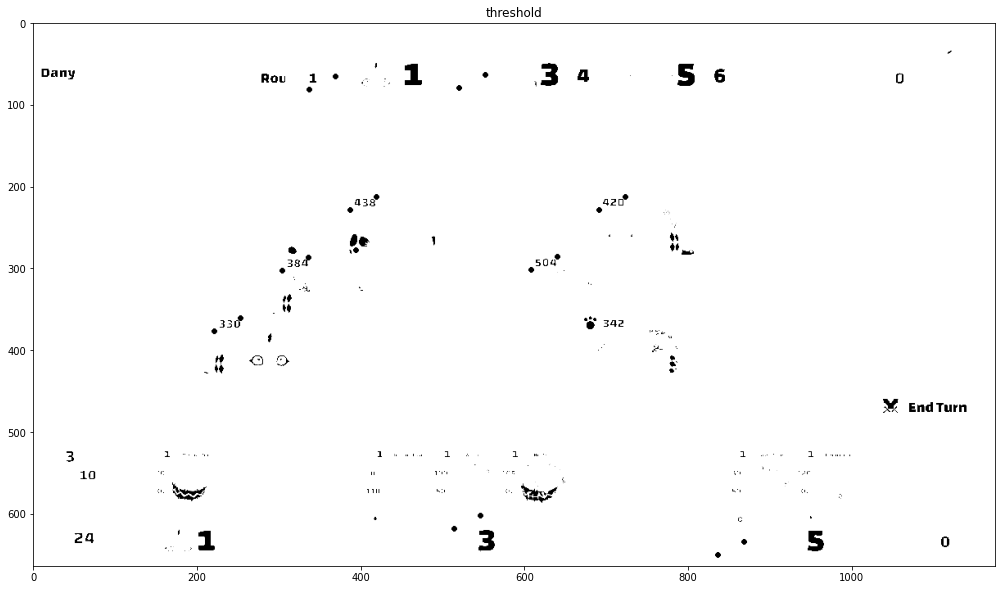

In [302]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCORR_NORMED']
pic_num = 0
for meth in methods:
#     _,img2=cv2.threshold(img2,100,255,cv2.THRESH_BINARY)
    img = img2.copy()
    list_health_num = []
    a = time.time()
    for i_name, template in enumerate(list_template):
        w, h = template.shape[::-1]
        method = eval(meth)
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # 使用不同的比􏱖方法􏰶对结果的􏰰􏰱不同
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
#         print(bottom_right)
        cv2.rectangle(img,top_left, bottom_right, 0, -1)

        num_left = bottom_right
        num_right = (num_left[0] + 32, num_left[1] - 16)
        
        aaa = img[num_right[1]:num_left[1], num_left[0]:num_right[0]]
#         list_health_num.append()
        plt.figure(figsize=(2, 2))
        plt.imshow(aaa, cmap="gray")
        plt.axis("off")
        plt.show()
        
        cv2.circle(img,num_left,2,(255,0,0),2)
        cv2.circle(img,num_right,2,(255,0,0),2)
    cost = int((time.time() - a)* 1000 )
    pic_num = pic_num + 1
    draw_sub(pic_num, f"{meth}_{cost}", img)
    break
    
# 二级
img_rev_gray_del_tem = ~img
ret, thresh = cv2.threshold(img_rev_gray_del_tem, 5, 255, cv2.THRESH_TRUNC)
draw_sub(1, "threshold", thresh)